<a href="https://colab.research.google.com/github/srivatsan88/End-to-End-Time-Series/blob/master/Multivariate_Time_Series_using_VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/appliance_energy_usage.csv', index_col=0, parse_dates=True)

In [3]:
df

,Appliances,lights,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Visibility
date,,,,,,,,
2016-01-11 17:00:00,60,30,6.600000,733.5,92.000000,7.000000,5.300000,63.000000
2016-01-11 17:10:00,60,30,6.483333,733.6,92.000000,6.666667,5.200000,59.166667
2016-01-11 17:20:00,50,30,6.366667,733.7,92.000000,6.333333,5.100000,55.333333
2016-01-11 17:30:00,50,40,6.250000,733.8,92.000000,6.000000,5.000000,51.500000
2016-01-11 17:40:00,60,40,6.133333,733.9,92.000000,5.666667,4.900000,47.666667
...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,22.733333,755.2,55.666667,3.333333,13.333333,23.666667
2016-05-27 17:30:00,90,0,22.600000,755.2,56.000000,3.500000,13.300000,24.500000
2016-05-27 17:40:00,270,10,22.466667,755.2,56.333333,3.666667,13.266667,25.333333


In [4]:
df=df.resample('1H').mean()

In [5]:
df

,Appliances,lights,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Visibility
date,,,,,,,,
2016-01-11 17:00:00,55.000000,35.000000,6.308333,733.750000,92.000000,6.166667,5.050000,53.416667
2016-01-11 18:00:00,176.666667,51.666667,5.941667,734.266667,91.583333,5.416667,4.658333,40.000000
2016-01-11 19:00:00,173.333333,25.000000,6.000000,734.791667,89.750000,6.000000,4.391667,40.000000
2016-01-11 20:00:00,125.000000,35.000000,6.000000,735.283333,87.583333,6.000000,4.016667,40.000000
2016-01-11 21:00:00,103.333333,23.333333,5.833333,735.566667,87.416667,6.000000,3.816667,40.000000
...,...,...,...,...,...,...,...,...
2016-05-27 14:00:00,101.666667,1.666667,21.916667,755.800000,59.000000,2.000000,13.475000,21.583333
2016-05-27 15:00:00,76.666667,0.000000,22.216667,755.675000,57.333333,2.000000,13.258333,21.833333
2016-05-27 16:00:00,135.000000,0.000000,22.883333,755.375000,55.000000,2.416667,13.283333,22.583333


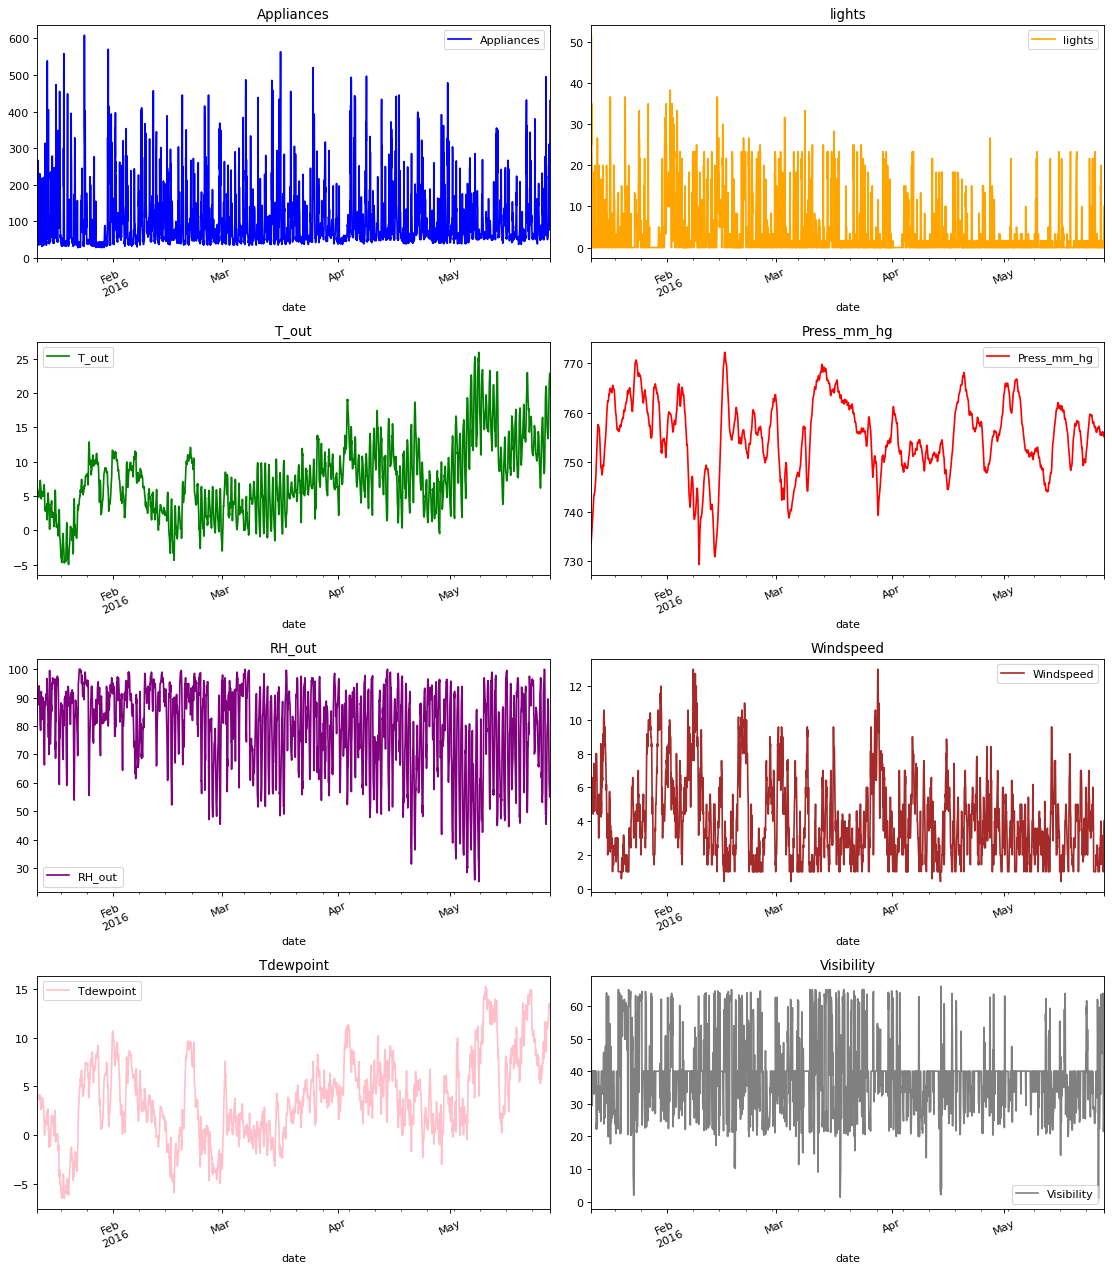

In [6]:
color_list = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]


def Visualize(data):
    features= list(df.select_dtypes(include=[np.number]).columns.values)
    feature_size=len(features)
    fig, axes = plt.subplots(
        nrows=int(np.ceil(feature_size/2)), ncols=2, figsize=(14, feature_size*2), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(feature_size):
        key = features[i]
        c = color_list[i % (len(color_list))]
        t_data = data[key]
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(key),
            rot=25,
        )
        ax.legend([key])
    plt.tight_layout()


Visualize(df)

Null Hypothesis - Series possesses a unit root and hence is not stationary

Alternate Hypothesis - Series is stationary

In [7]:
for i in range(len(df.columns)):
  result = adfuller(df[df.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is not Stationary'.format(df.columns[i]))
  else:
    print('{} - Series is Stationary'.format(df.columns[i]))

Appliances - Series is Stationary
lights - Series is Stationary
T_out - Series is Stationary
Press_mm_hg - Series is Stationary
RH_out - Series is Stationary
Windspeed - Series is Stationary
Tdewpoint - Series is Stationary
Visibility - Series is Stationary


 H0: Xt does not granger causes Yt
 
 H1: Xt granger causes Yt

In [8]:
max_lags=8
y='Appliances'

In [9]:
for i in range(len(df.columns)-1):
  results=grangercausalitytests(df[[y,df.columns[i+1]]], max_lags, verbose=False)
  p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
  print('Column - {} : P_Values - {}'.format(df.columns[i+1],p_values))

Column - lights : P_Values - [0.1451, 0.0005, 0.0001, 0.0002, 0.0001, 0.0001, 0.0006, 0.0012]
Column - T_out : P_Values - [0.002, 0.0001, 0.0001, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - Press_mm_hg : P_Values - [0.0985, 0.1956, 0.0351, 0.0016, 0.0, 0.0001, 0.0, 0.0]
Column - RH_out : P_Values - [0.0, 0.0004, 0.0004, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - Windspeed : P_Values - [0.0004, 0.0041, 0.0094, 0.0082, 0.0163, 0.0119, 0.0009, 0.0002]
Column - Tdewpoint : P_Values - [0.4348, 0.4494, 0.5005, 0.3887, 0.05, 0.0694, 0.0992, 0.1152]
Column - Visibility : P_Values - [0.7071, 0.5372, 0.7338, 0.8265, 0.544, 0.3324, 0.2521, 0.3465]


In [10]:
df_input=df[['Appliances','T_out','Windspeed']]

In [11]:
df_input

,Appliances,T_out,Windspeed
date,,,
2016-01-11 17:00:00,55.000000,6.308333,6.166667
2016-01-11 18:00:00,176.666667,5.941667,5.416667
2016-01-11 19:00:00,173.333333,6.000000,6.000000
2016-01-11 20:00:00,125.000000,6.000000,6.000000
2016-01-11 21:00:00,103.333333,5.833333,6.000000
...,...,...,...
2016-05-27 14:00:00,101.666667,21.916667,2.000000
2016-05-27 15:00:00,76.666667,22.216667,2.000000
2016-05-27 16:00:00,135.000000,22.883333,2.416667


In [12]:
df_train = df_input[:int(0.9*(len(df_input)))]
df_test = df_input[int(0.9*(len(df_input))):]

In [13]:
df_train.shape

(2961, 3)

In [14]:
df_test.shape

(329, 3)

![link text](https://wikimedia.org/api/rest_v1/media/math/render/svg/d79bead4e9192d7fe2470a7936e4623e9ff252e1)

![link text](https://wikimedia.org/api/rest_v1/media/math/render/svg/d88ac4002c0641b2e93fb6d35f961ea63352b6a9)

In [15]:
model = VAR(df_train, freq="1H")
for i in range(48):
    results = model.fit(i+1)
    print('Order = ', i+1)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)

Order =  1
AIC:  7.126785098024288
BIC:  7.151080819162064
Order =  2
AIC:  6.138769168927821
BIC:  6.181298651759995
Order =  3
AIC:  6.019982255185911
BIC:  6.080755770837745
Order =  4
AIC:  5.960526790759722
BIC:  6.03955461973309
Order =  5
AIC:  5.908069667837071
BIC:  6.005362100022209
Order =  6
AIC:  5.891197292905782
BIC:  6.006764627593054
Order =  7
AIC:  5.85225035501184
BIC:  5.986102900903522
Order =  8
AIC:  5.841915871050664
BIC:  5.994063946272741
Order =  9
AIC:  5.827889041110309
BIC:  5.998342973224303
Order =  10
AIC:  5.825120732509795
BIC:  6.013890858524602
Order =  11
AIC:  5.791083147024334
BIC:  5.998179813408081
Order =  12
AIC:  5.78322849534456
BIC:  6.008662058036488
Order =  13
AIC:  5.764122425516564
BIC:  6.00790324993892
Order =  14
AIC:  5.754516806234102
BIC:  6.016655267304059
Order =  15
AIC:  5.745057263179905
BIC:  6.025563745321492
Order =  16
AIC:  5.734159567395153
BIC:  6.033044464551212
Order =  17
AIC:  5.734437324119505
BIC:  6.051711039

In [16]:
model.select_order(48).summary()

,AIC,BIC,FPE,HQIC
0,13.82,13.83,1.005e+06,13.82
1,7.139,7.163,1260.,7.148
2,6.149,6.192,468.3,6.165
3,6.031,6.093,416.2,6.053
4,5.970,6.050,391.7,5.999
5,5.917,6.015,371.3,5.952
6,5.902,6.019,365.7,5.944
7,5.863,5.999*,351.9,5.912
8,5.852,6.006,348.1,5.908
9,5.837,6.010,342.9,5.900


In [17]:
model = VAR(df_train, freq="1H")
results = model.fit(7)

In [19]:
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 14, May, 2021
Time:                     16:26:32
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    5.98610
Nobs:                     2954.00    HQIC:                   5.90043
Log likelihood:          -21152.4    FPE:                    348.017
AIC:                      5.85225    Det(Omega_mle):         340.356
--------------------------------------------------------------------
Results for equation Appliances
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                37.865935         3.448219           10.981           0.000
L1.Appliances         0.451436         0.018470           24.442           0.000
L1.T_out              2.328238         2.534185        

In [20]:
lag=results.k_ar

In [21]:
results.forecast(df_train.values[-lag:],steps=5)

array([[44.34598018,  8.92651619,  3.99333186],
       [33.70923187,  8.81719814,  4.13871016],
       [38.32344216,  9.01953267,  4.188856  ],
       [53.39756915,  9.3356185 ,  4.31429082],
       [60.93798924,  9.56974211,  4.40093836]])

In [22]:
df_test[0:5]

,Appliances,T_out,Windspeed
date,,,
2016-05-14 02:00:00,60.000000,8.891667,3.166667
2016-05-14 03:00:00,60.000000,8.725000,2.833333
2016-05-14 04:00:00,60.000000,8.775000,4.416667
2016-05-14 05:00:00,56.666667,8.683333,5.000000
2016-05-14 06:00:00,63.333333,8.716667,5.000000


In [23]:
df_coeff=pd.DataFrame([results.params['Appliances'],results.pvalues['Appliances']]).T

In [24]:
df_coeff

,Appliances,Appliances
const,37.865935,4.701032e-28
L1.Appliances,0.451436,6.138160e-132
L1.T_out,2.328238,3.582355e-01
L1.Windspeed,2.268735,2.564126e-01
L2.Appliances,0.222279,4.255512e-28
L2.T_out,-4.372626,4.302427e-01
L2.Windspeed,-1.481847,6.603327e-01
L3.Appliances,-0.019489,3.454670e-01
L3.T_out,5.606923,3.952787e-01
L3.Windspeed,0.184615,9.598961e-01


In [25]:
df_coeff.columns = ['coeff','pval']

In [26]:
df_coeff.query('pval < 0.05')
np.where(df_coeff['pval'] < 0.05,1, 0)

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [27]:
df_coeff['valid']=np.where(df_coeff['pval'] < 0.05,1, 0)

In [28]:
df_coeff

,coeff,pval,valid
const,37.865935,4.701032e-28,1
L1.Appliances,0.451436,6.138160e-132,1
L1.T_out,2.328238,3.582355e-01,0
L1.Windspeed,2.268735,2.564126e-01,0
L2.Appliances,0.222279,4.255512e-28,1
L2.T_out,-4.372626,4.302427e-01,0
L2.Windspeed,-1.481847,6.603327e-01,0
L3.Appliances,-0.019489,3.454670e-01,0
L3.T_out,5.606923,3.952787e-01,0
L3.Windspeed,0.184615,9.598961e-01,0


In [29]:
#coeff_arr=np.multiply(df_coeff['coeff'], df_coeff['valid'])[1:].values
coeff_arr=df_coeff['coeff'][1:].values

In [30]:
coeff_arr.shape

(21,)

In [31]:
coeff_arr

array([ 0.45143647,  2.32823846,  2.26873466,  0.2222793 , -4.37262576,
       -1.48184722, -0.01948858,  5.60692324,  0.18461514, -0.04369054,
       -5.43530357, -0.08685622,  0.00738616,  5.17191268, -1.99030973,
       -0.01683822,  3.22703425,  4.97164661, -0.01091878, -6.77733848,
       -2.97259279])

In [32]:
df_train[-lag:]

,Appliances,T_out,Windspeed
date,,,
2016-05-13 19:00:00,208.333333,19.333333,9.000000
2016-05-13 20:00:00,120.000000,17.066667,8.166667
2016-05-13 21:00:00,63.333333,14.116667,6.583333
2016-05-13 22:00:00,55.000000,11.850000,6.833333
2016-05-13 23:00:00,61.666667,10.466667,7.583333
2016-05-14 00:00:00,58.333333,9.791667,5.750000
2016-05-14 01:00:00,63.333333,9.333333,4.000000


In [33]:
in_arr=df_train[-lag:][::-1].stack().to_frame().T.values

In [34]:
in_arr.shape

(1, 21)

In [35]:
in_arr

array([[ 63.33333333,   9.33333333,   4.        ,  58.33333333,
          9.79166667,   5.75      ,  61.66666667,  10.46666667,
          7.58333333,  55.        ,  11.85      ,   6.83333333,
         63.33333333,  14.11666667,   6.58333333, 120.        ,
         17.06666667,   8.16666667, 208.33333333,  19.33333333,
          9.        ]])

In [36]:
np.dot(in_arr, coeff_arr)+df_coeff['coeff'][:1].values

array([44.34598018])